In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Long Run Proportion of Heads ##

Fix $p$ for now, and consider a sequence of i.i.d. Bernoulli $(p)$ trials $I_1, I_2, \ldots$. By the Weak Law of Large Numbers, the proportion of successes is likely to be close to $p$ in the number of trials is large. But something even stronger is true, and is known as the Strong Law: with probability 1, the sample proportion converges to $p$. 

Establishing the Strong Law is beyond the scope of this course, but we can easily visualize the result by simulation. 

We will start with the function `binomial_proportion` that takes $p$ and $n$ as its arguments and returns an array consisting of the sequence $\{ \frac{S_k}{k}: k = 1, 2, \ldots, n\}$ where $S_k = I_1 + I_2 + \cdots + I_k$. That's the sequence of the proportions of heads in trials 1 through $n$.

In [2]:
def binomial_proportions(p, n):
    bernoulli = stats.binom.rvs(1, p, size=n)
    return np.cumsum(bernoulli)/np.arange(1, n+1)

In [7]:
binomial_proportions(0.5, 4)

array([ 0.        ,  0.5       ,  0.33333333,  0.5       ])

The array above is the sequence of proportions of heads in 4 tosses of a fair coin. See if you can work out the corresponding sequence of heads and tails.

The function `plot_binomial_proportions` plots the proportions. Its first argument is an array of values of $p$ and its second is the number of trials. For each value of $p$ in the array, the function runs $n$ i.i.d. Bernoulli $(p)$ trials, computes the proportions of successes using `binomial_proportions`, and plots them againt the trial numbers $k = 1, 2, \ldots , n$.

We will call each of the plots a *path* of the observed proportions.

In [8]:
def plot_binomial_proportions(p_array, n):
    for p in p_array:
        plt.plot(np.arange(1, n+1), binomial_proportions(p, n), lw=2)
    plt.ylim(-0.05, 1.05)
    plt.xlabel('$k$')
    plt.title('Proportion of Successes in $k$ Trials');

Let's use `plot_binomial_proportions` to simulate two sets of 1000 fair coin tosses and keep track of the proportion of heads.

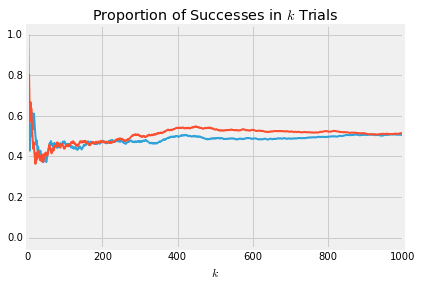

In [10]:
two_fair_coins = make_array(0.5, 0.5)
plot_binomial_proportions(two_fair_coins, 1000)

The paths fluctuate when the number of trials is low, but settle down to very near 0.5 as the number of trials increases.

If you are wondering why $p$ has to be entered as an array instead of just one number, be patient for a bit. Generate 10 paths of the proportions of sixes in 1000 rolls of a die, by first creating an array of 10 values of $p$, each of which is 1/6.

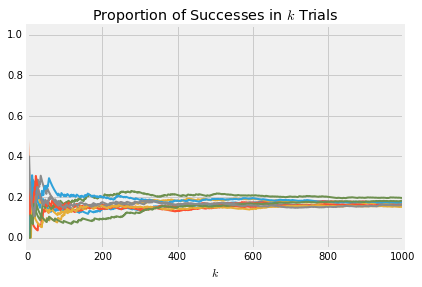

In [13]:
ten_dice = (1/6)*np.ones(10)
plot_binomial_proportions(ten_dice, 1000)

These paths level off at $1/6$.

In general, the proportions of heads converge to the fixed value of $p$.

### Randomizing $p$ ###
Now let's choose the initial $p$ at random. We'll start with a simple prior and pick $p$ to be either 0.2 or 0.7 with chance 1/2 each. 

The process then becomes:
- Choose a value of $p$ uniformly from 0.2 and 0.7.
- With that chosen value of $p$, toss a $p$-coin and keep track of the proportion of heads.

To generate paths of this process, we have to start with a random choice of $p$. This is why we have been specifying the values of $p$ as an array. The length of the array is the number of paths to plot.

Here are 10 paths. Notice how `np.random.choice` is being used to pick $p$. You have used this method in your labs.

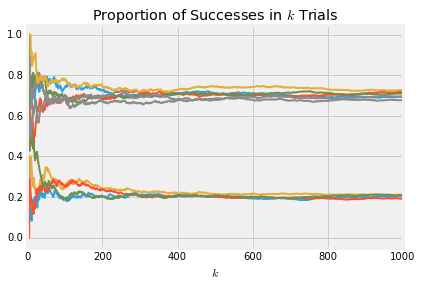

In [19]:
random_p = np.random.choice([0.2, 0.7], size = 10, p = [0.5, 0.5])
plot_binomial_proportions(random_p, 1000)

Now you can see about half the paths settling down at 0.2 and the other half at 0.7. This makes sense: about half the time, the chosen value of $p$ will be 0.2, and those paths will settle at 0.2 as we saw in the earlier examples. The other half of the time, the chosen $p$ will be 0.7 and the corresponding paths will settle at 0.7

What you have observed is that **if $n$ is large, the distribution of the observed proportion at time $n$ is close to the prior distribution of $p$.**

### Beta Prior ###
Suppose we start with the uniform prior. As in the previous section, we let $X$ be uniform on $(0, 1)$, and given $X = p$ we run i.i.d. Bernoulli $(p)$ trials. Here are 10 paths of this process, consisting of 1000 trials each. Remember that the uniform $(0, 1)$ distribution is the same as beta $(1, 1)$.

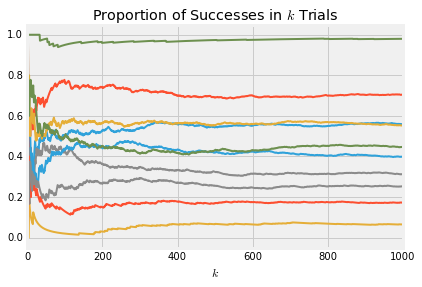

In [22]:
p_array = stats.beta.rvs(size = 10, a = 1, b = 1)
plot_binomial_proportions(p_array, 1000)

Look at the right edge of the graph. That's a sample of 10 points from the distribution of the sample proportion of successes in 1000 trials. Run the cell a few times and you should see that the distribution looks roughly uniform.

Indeed, from bottom to top you are essentially seeing the order statistics of 10 i.i.d. uniform $(0, 1)$ random variables.

Here are 15 paths of the proportion of successes when the probability of success is picked according to the beta $(2, 8)$ distribution.

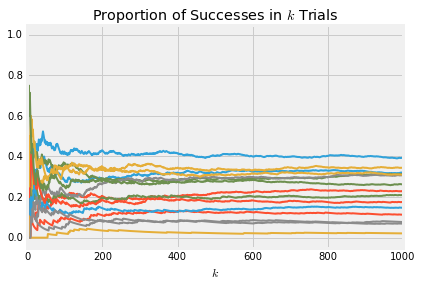

In [23]:
p_array = stats.beta.rvs(size = 15, a = 2, b = 8)
plot_binomial_proportions(p_array, 1000)

The graph below shows the beta $(2, 8)$ density. The bulk of the probability is over the interval 0 to 0.6, consistent with where the paths end up in the graph above.

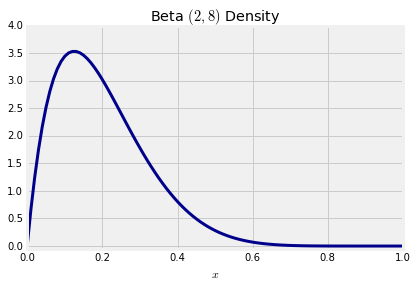

In [32]:
x = np.arange(0, 1.01, 0.01)
y = stats.beta.pdf(x, a = 2, b = 8)
plt.plot(x, y, color='darkblue', lw=3)
plt.ylim(-0.05, 4)
plt.xlabel('$x$')
plt.title('Beta $(2, 8)$ Density');

### Beta Prior, Beta Limit ###
What the graphs in this section demonstrate is that the distribution of the long run proportion of successes is the same as the prior distribution of the chance of success.

If the prior distribution is beta $(r, s)$, the limit distribution of the proportion of successes will be beta $(r, s)$ also.

Here is a simulation that confirms this. It consists of 10,000 repetitions of the following process:
- Pick $p$ from the beta $(2, 8)$ density.
- Toss a $p$-coin 1000 times and record the proportion of heads.

The histogram shows the distribution the 10,000 simulated proportions, with the beta $(2, 8)$ density overlaid.

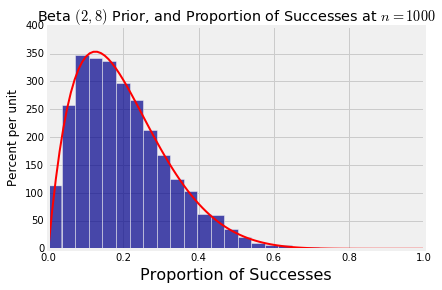

In [25]:
proportions = make_array()
for i in range(10000):
    chosen_p = stats.beta.rvs(size = 1, a = 2, b = 8)
    obs_prop = stats.binom.rvs(size = 1, n = 1000, p = chosen_p)/1000
    proportions = np.append(proportions, obs_prop)

Table().with_column('Proportion of Successes', proportions).hist(bins=20)
x = np.arange(0, 1.01, 0.01)
y = stats.beta.pdf(x, a = 2, b = 8)
plt.plot(x, y, color='red', lw=2)
plt.title('Beta $(2, 8)$ Prior, and Proportion of Successes at $n = 1000$');